# Gunjan Chakraborty

## 22MSRDS007

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Load the dataset
df = pd.read_csv('D:/Chools/Day_10/diabetes.csv')

### 1. Exploratory Data Analysis (EDA):

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


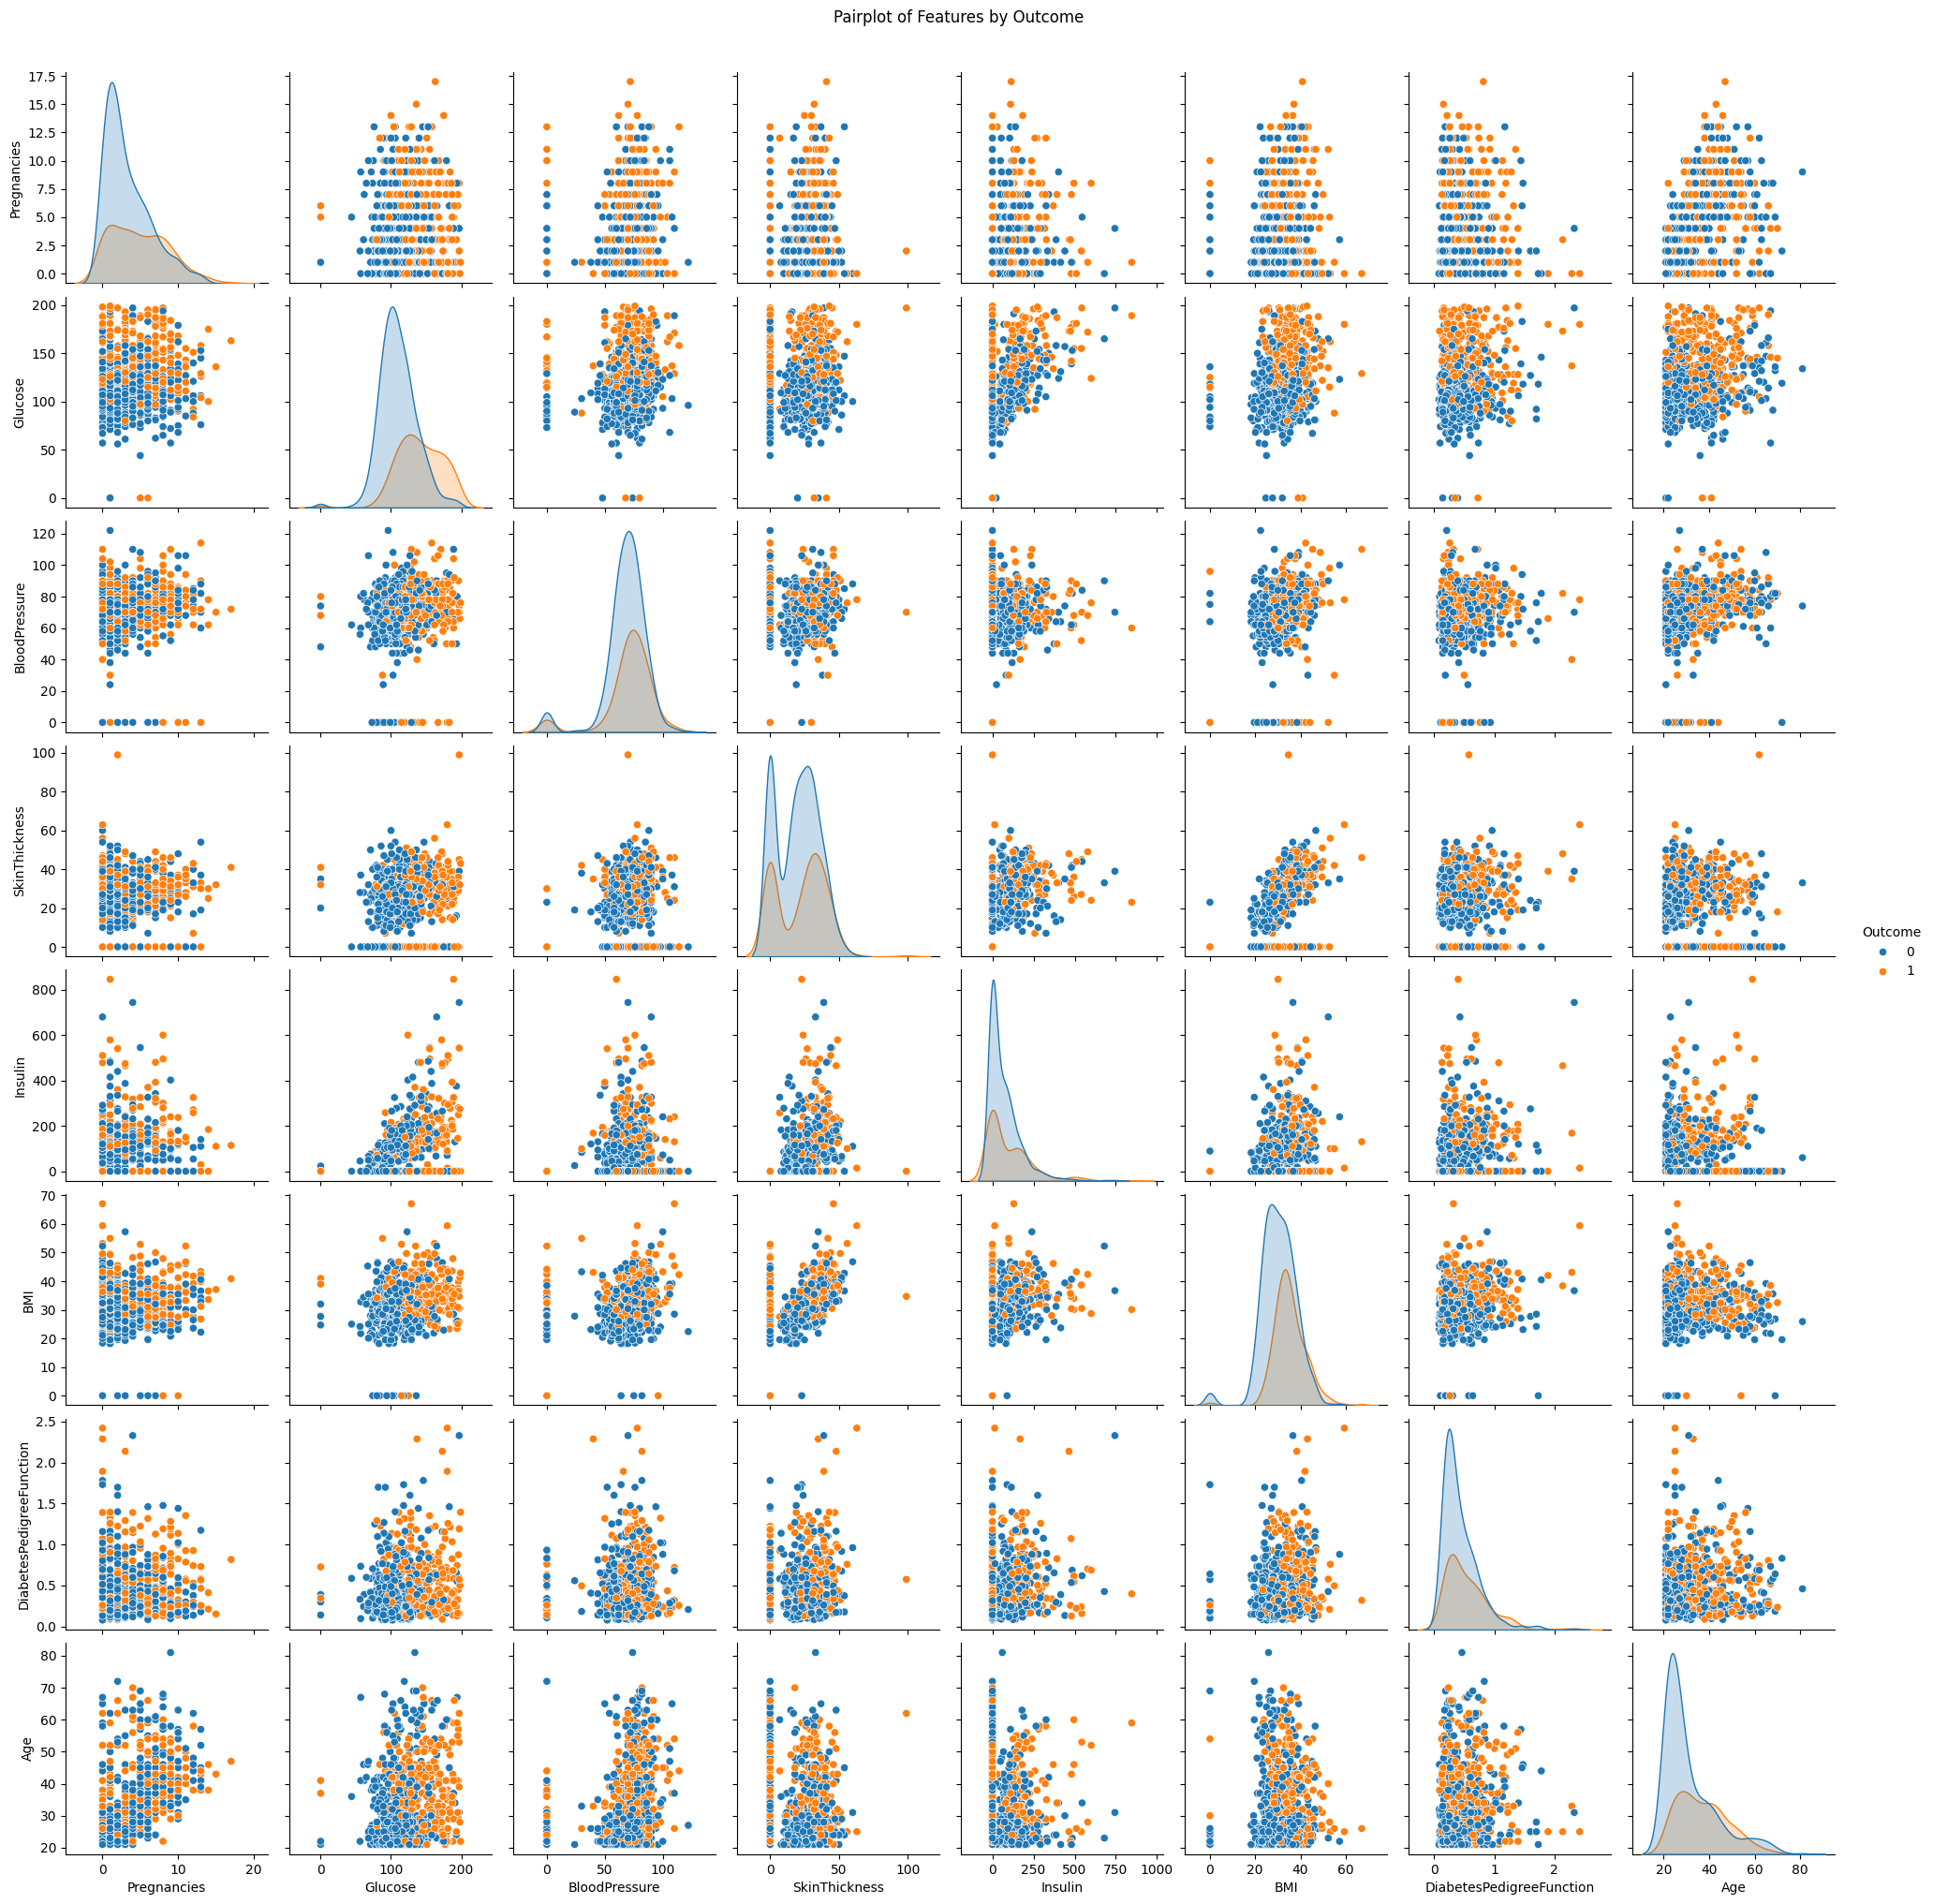

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Outcome')
plt.suptitle('Pairplot of Features by Outcome', y=1.02)
plt.show()

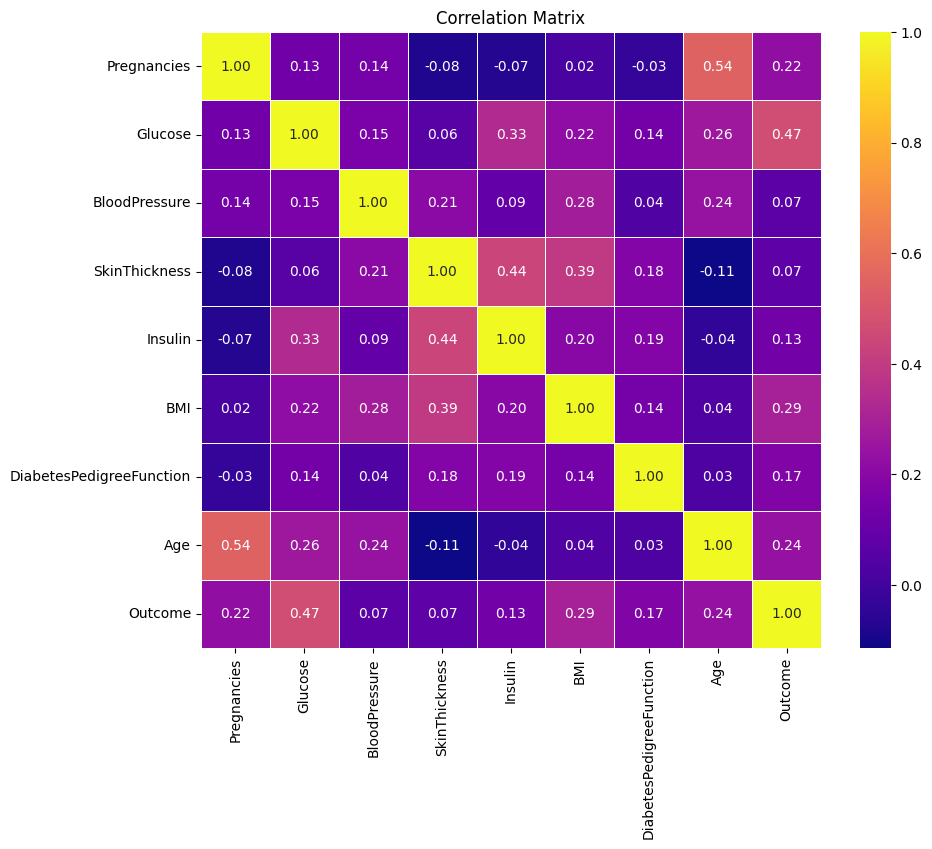

In [7]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

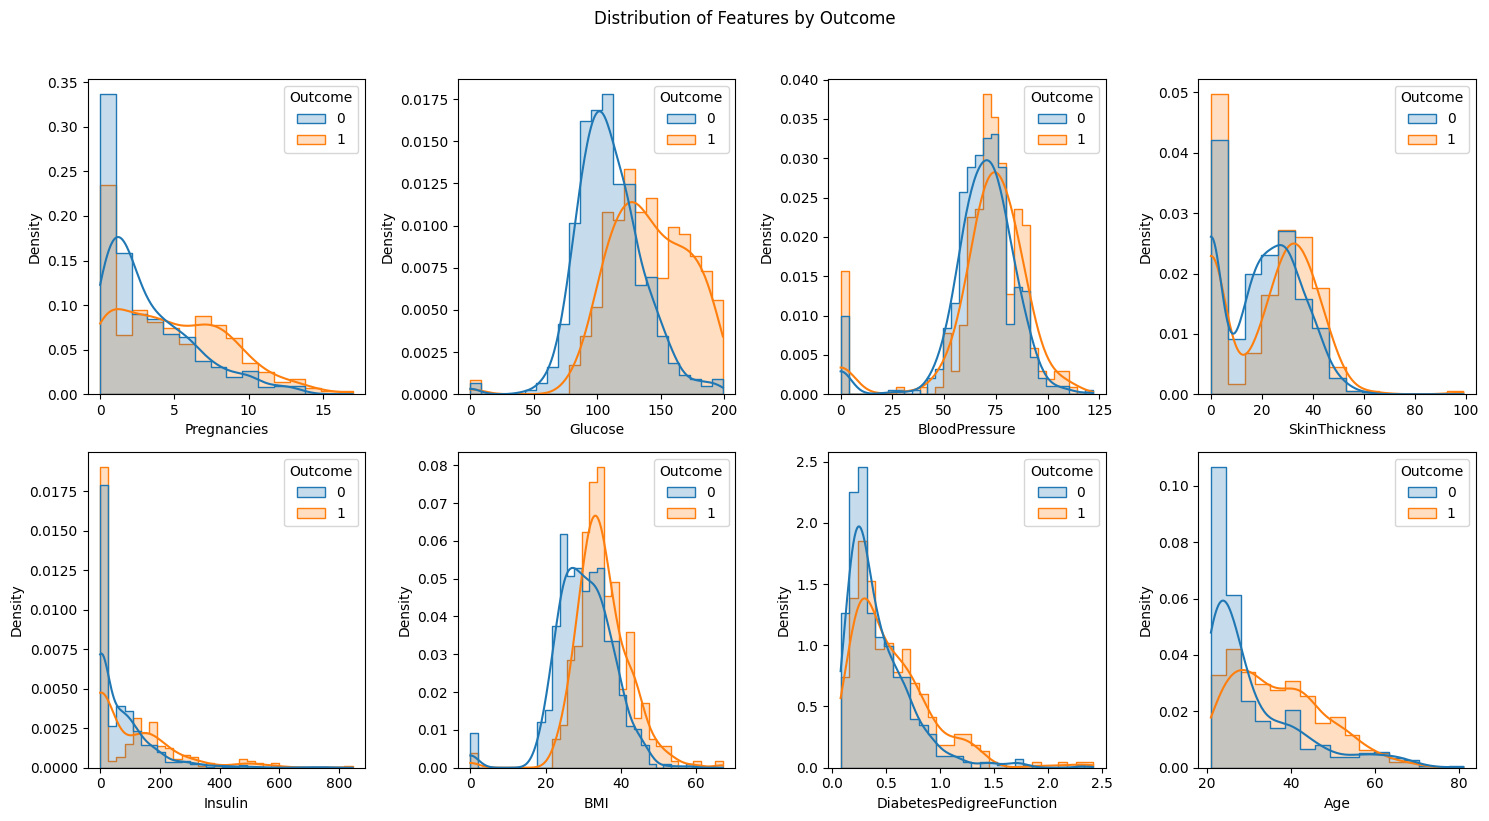

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of each feature by Outcome with a unified histogram
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distribution of Features by Outcome', y=1.02)

for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, hue='Outcome', kde=True, element="step", stat="density", common_norm=False, ax=axes[i // 4, i % 4])

plt.tight_layout()
plt.show()

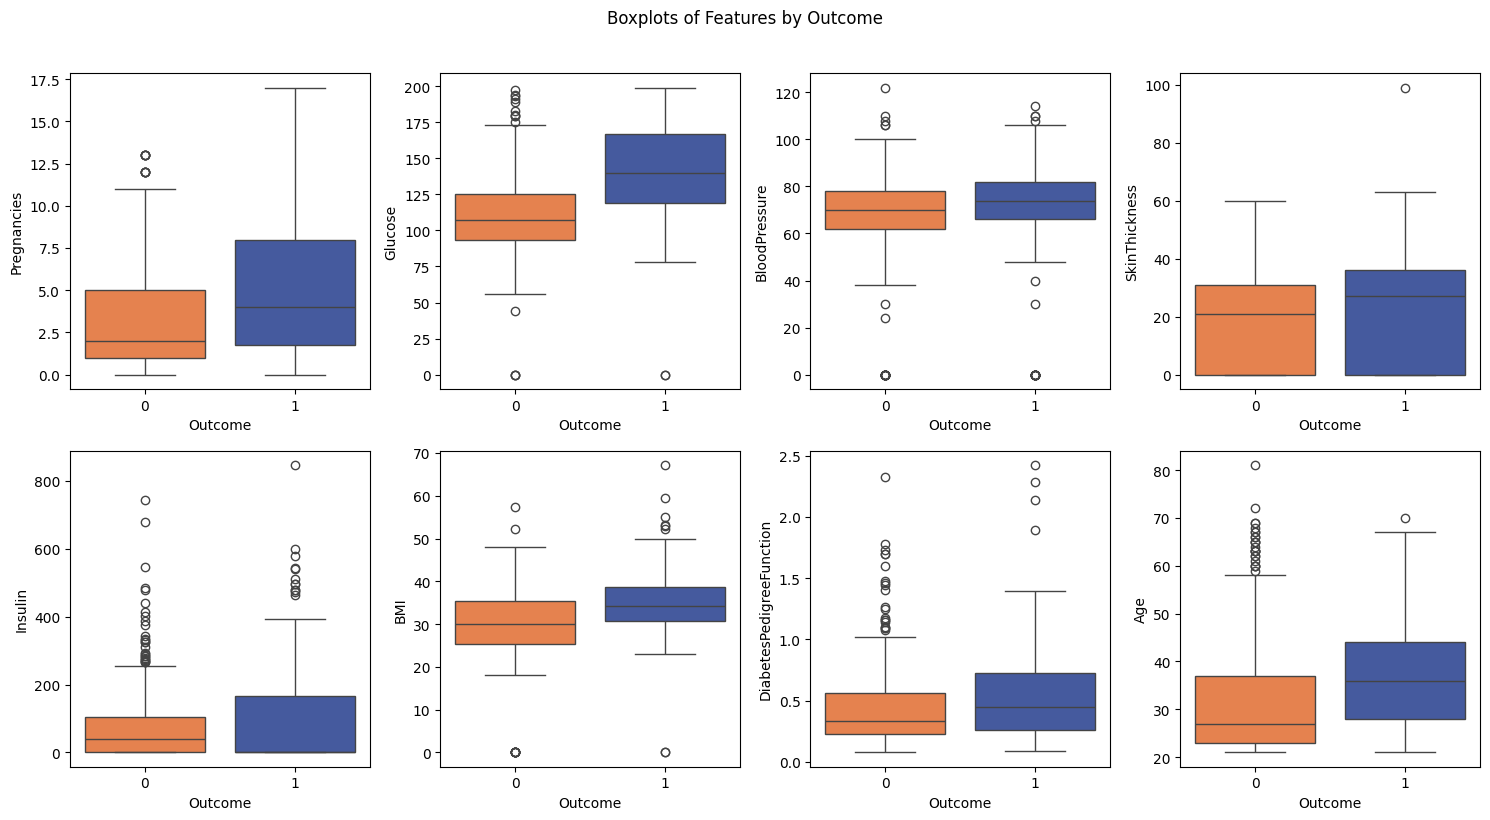

In [9]:
# Define a colorful palette
colors = ["#FE7A36", "#3652AD"]

# Boxplots for each feature by Outcome
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Boxplots of Features by Outcome', y=1.02)

for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x='Outcome', y=column, ax=axes[i // 4, i % 4], palette=colors)

plt.tight_layout()
plt.show()


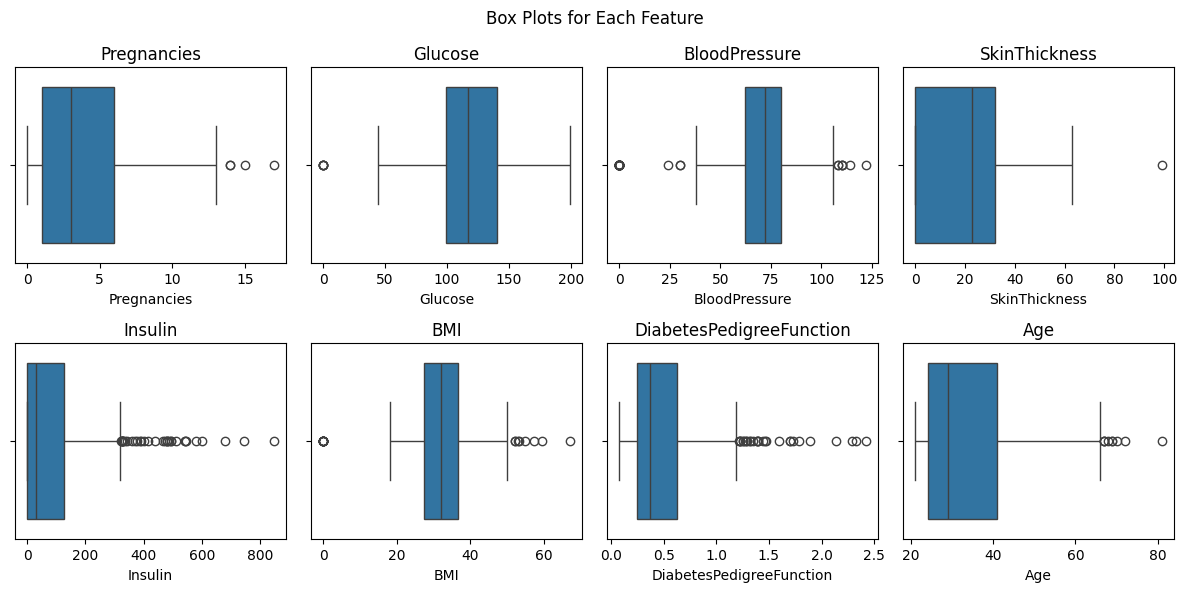

In [10]:
# Select columns excluding 'Outcome'
columns_to_plot = df.iloc[:, :-1]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
fig.suptitle('Box Plots for Each Feature')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each column
for i, column in enumerate(columns_to_plot.columns):
    sns.boxplot(x=columns_to_plot[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

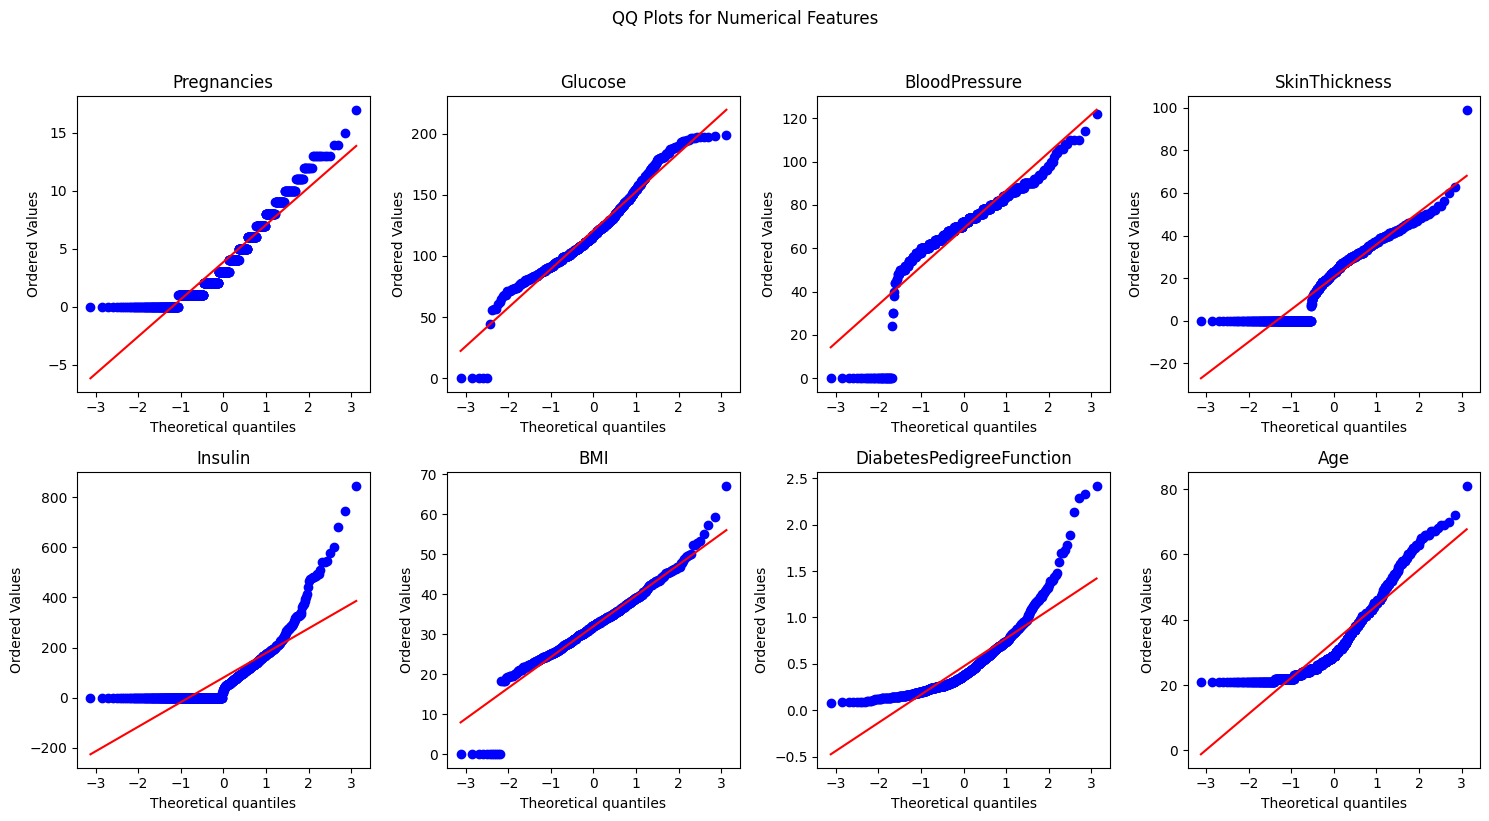

In [11]:
# Q-Q plot
import statsmodels.api as sm
from scipy.stats import probplot

# QQ plot for each numerical feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('QQ Plots for Numerical Features', y=1.02)

for i, column in enumerate(df.columns[:-1]):
    probplot(df[column], plot=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)

plt.tight_layout()
plt.show()

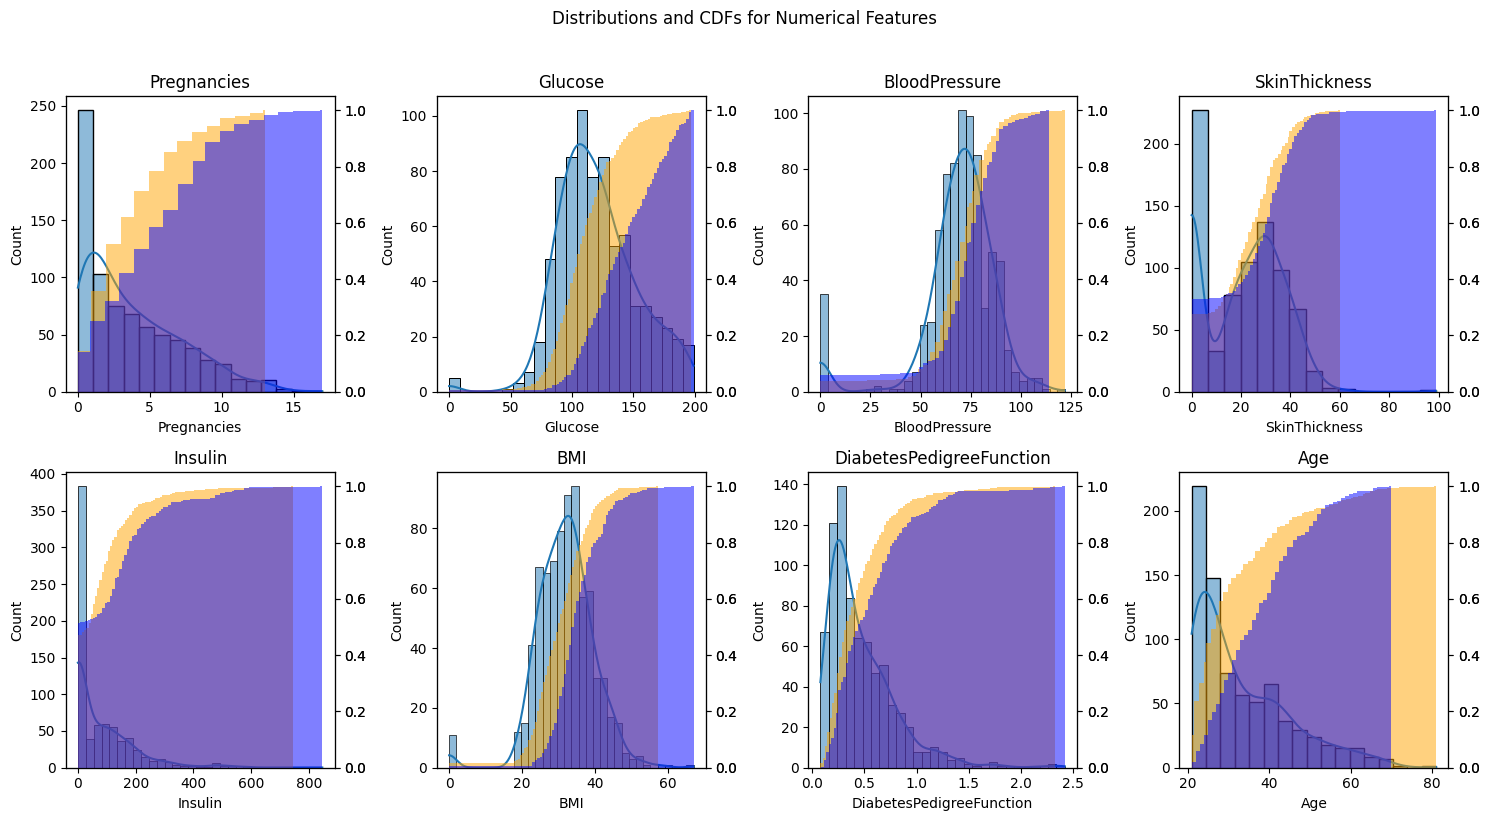

In [12]:
# Individual feature distributions and CDFs
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle('Distributions and CDFs for Numerical Features', y=1.02)

for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)
    axes[i // 4, i % 4].twinx().hist(df[df['Outcome'] == 0][column], cumulative=True, bins=100, color='orange', alpha=0.5, density=True)
    axes[i // 4, i % 4].twinx().hist(df[df['Outcome'] == 1][column], cumulative=True, bins=100, color='blue', alpha=0.5, density=True)

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X contains the predictor variables
VIF = df.drop('Outcome', axis=1)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]

# Display the VIF values
print(vif_data)

                   Variable        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


## Interpretation

1. **Glucose (VIF = 16.72):**
   - A VIF of 16.72 for 'Glucose' suggests a high level of multicollinearity with other variables in the dataset. This may indicate that 'Glucose' has a strong correlation with other predictor variables, potentially affecting the stability and reliability of the regression model.

2. **BloodPressure (VIF = 14.61):**
   - Similar to 'Glucose', a VIF of 14.61 for 'BloodPressure' indicates a high level of multicollinearity. This variable seems to have a strong correlation with other predictors.

3. **BMI (VIF = 18.40):**
   - 'BMI' has a very high VIF, suggesting a substantial degree of multicollinearity with other variables. This should be carefully considered, as it may affect the interpretation of the regression coefficients.

4. **Age (VIF = 13.49):**
   - 'Age' also has a high VIF, indicating multicollinearity. The presence of strong correlations between 'Age' and other predictors may impact the reliability of the regression model.

Variables with VIF values above a certain threshold (commonly 5-10) are considered to have problematic levels of multicollinearity. In this case, 'Glucose,' 'BloodPressure,' 'BMI,' and 'Age' exhibit high VIF values, suggesting potential issues.

To address multicollinearity, we may consider:
- Removing one of the highly correlated variables.
- Combining correlated variables into a composite feature.
- Applying regularization techniques (e.g., Ridge or Lasso regression) that automatically penalize the influence of highly correlated predictors.


In [14]:
import numpy as np

# Calculate Z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for outliers (e.g., Z-score greater than 3)
outlier_threshold = 3

# Identify outliers for each column
outliers = (z_scores > outlier_threshold).sum()

# Display the count of outliers for each column
print("Number of outliers for each column:")
print(outliers)

Number of outliers for each column:
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
Outcome                      0
dtype: int64


In [15]:
# Remove outliers using z-score or IQR method
from scipy.stats import zscore

z_scores = zscore(df)
df_no_outliers = df[(z_scores < 3).all(axis=1)]


In [16]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               729 non-null    int64  
 1   Glucose                   729 non-null    int64  
 2   BloodPressure             729 non-null    int64  
 3   SkinThickness             729 non-null    int64  
 4   Insulin                   729 non-null    int64  
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  729 non-null    float64
 7   Age                       729 non-null    int64  
 8   Outcome                   729 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


### 3. Model Fitting:

In [17]:
X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']

In [18]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import models
from keras import layers


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a simple neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
17/17 [==============================] - 1s 10ms/step - loss: 0.7601 - accuracy: 0.3874 - val_loss: 0.6918 - val_accuracy: 0.6271
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6546 - val_loss: 0.6396 - val_accuracy: 0.6102
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7385 - val_loss: 0.6060 - val_accuracy: 0.6271
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7519 - val_loss: 0.5804 - val_accuracy: 0.6949
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7634 - val_loss: 0.5703 - val_accuracy: 0.6949
Epoch 6/10
17/17 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7710 - val_loss: 0.5679 - val_accuracy: 0.6949
Epoch 7/10
17/17 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7844 - val_loss: 0.5654 - val_accuracy: 0.6949
Epoch 8/10
17/17 [=

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

5/5 [==============================] - 0s 1ms/step
Confusion Matrix:
[[94  8]
 [15 29]]


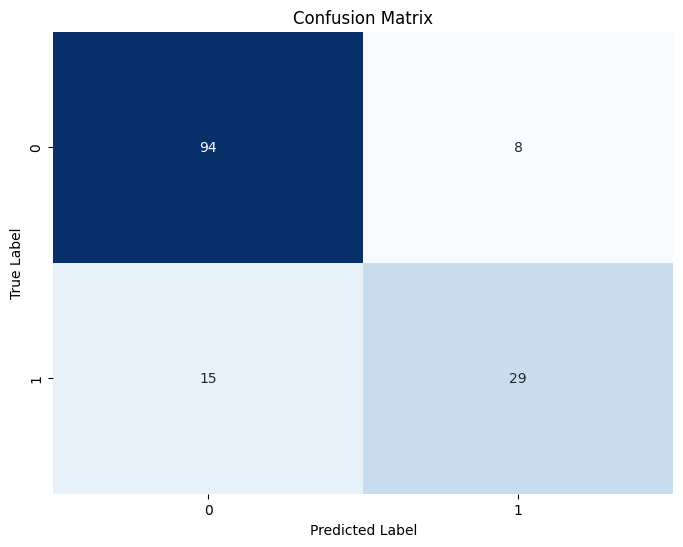

In [21]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

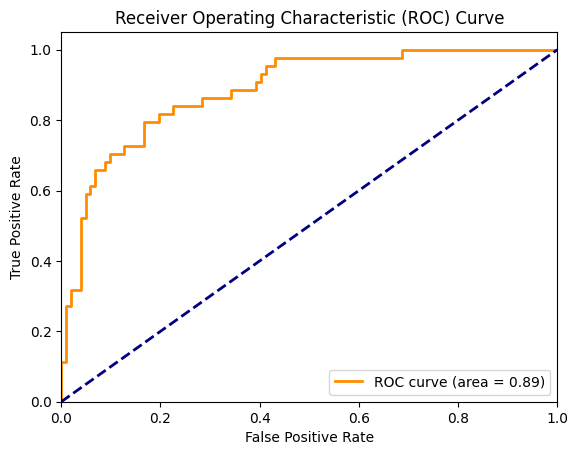

In [22]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Regression

In [23]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a simple regression model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # No activation function for regression

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss for regression

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluating the model
test_loss = model.evaluate(X_test_scaled, y_test)
print('Test loss:', test_loss)


Epoch 1/10
17/17 [==============================] - 1s 8ms/step - loss: 0.2362 - val_loss: 0.2312
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1674 - val_loss: 0.2188
Epoch 3/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1587 - val_loss: 0.2251
Epoch 4/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1508 - val_loss: 0.2201
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.1468 - val_loss: 0.2202
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1434 - val_loss: 0.2179
Epoch 7/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1395 - val_loss: 0.2169
Epoch 8/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1361 - val_loss: 0.2190
Epoch 9/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1344 - val_loss: 0.2284
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1281
Test loss: 0.12810076773166656


Interpretation of the results:

- **Training Loss (Epochs 1-10):** The training loss decreases steadily over the epochs, indicating that the model is improving its performance on the training data.
  
- **Validation Loss (Epochs 1-10):** The validation loss also decreases initially, indicating that the model generalizes well to unseen data. However, there is a slight increase in validation loss towards the end of training, which suggests that the model may be starting to overfit the training data slightly.

- **Test Loss:** The test loss (or evaluation loss) is calculated after training the model and evaluating it on the test set. In this case, the test loss is 0.1281, which represents the mean squared error between the predicted and actual values on the test set. Lower test loss indicates better performance of the model on unseen data.

Overall, the model seems to perform reasonably well on the given regression task, with the test loss being relatively low. However, it's essential to monitor for overfitting, especially if the validation loss starts to increase significantly while the training loss continues to decrease. Regularization techniques or model adjustments may be necessary to address overfitting if observed.

In [24]:
# Predictions on test set
y_pred = model.predict(X_test_scaled).flatten()  # Flatten the predictions to make them 1D

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test)**2)

print('Mean Squared Error (MSE):', mse)

5/5 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 0.12810076207192475


The Mean Squared Error (MSE) value of approximately 0.128 suggests that, on average, the squared difference between the predicted values and the actual values in the test set is 0.128.

Since the MSE is a measure of the average squared deviation of predictions from the actual values, a lower MSE indicates better performance of the regression model. In this case, the MSE value of 0.128 indicates that the model's predictions are relatively close to the actual values in the test set.

